In [1]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales= pd.read_csv('facebook live sale thailand.csv')
sales

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

In [4]:
sales.describe()

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,3525.500000,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,2035.304031,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,1763.250000,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,3525.500000,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,5287.750000,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,7050.000000,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


# Data Preprocessing and Exploration

In [6]:
#lets remove the redundant coloumns
columns_to_delete=["Column1","Column2","Column3","Column4"]
for column in columns_to_delete:
    del sales[column]

In [7]:
sales

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


In [8]:
#let's convert status_id to a string column
sales['status_id'] = sales['status_id'].astype(str)

In [9]:
#Let's review the non-numerical features in the dataset for unique features
sales['status_id'].unique(), sales['status_published'].unique(), sales['status_type'].unique()

(array(['1', '2', '3', ..., '7048', '7049', '7050'], dtype=object),
 array(['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17', ...,
        '9/21/2016 23:03', '9/20/2016 0:43', '9/10/2016 10:30'],
       dtype=object),
 array(['video', 'photo', 'link', 'status'], dtype=object))

In [10]:
#status id and status published have too many unique variables, which will not be suitable for the clustering analysis. 
#let's drop off status id and status published
sales.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [11]:
sales

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0
7047,photo,2,0,0,1,1,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0


In [12]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


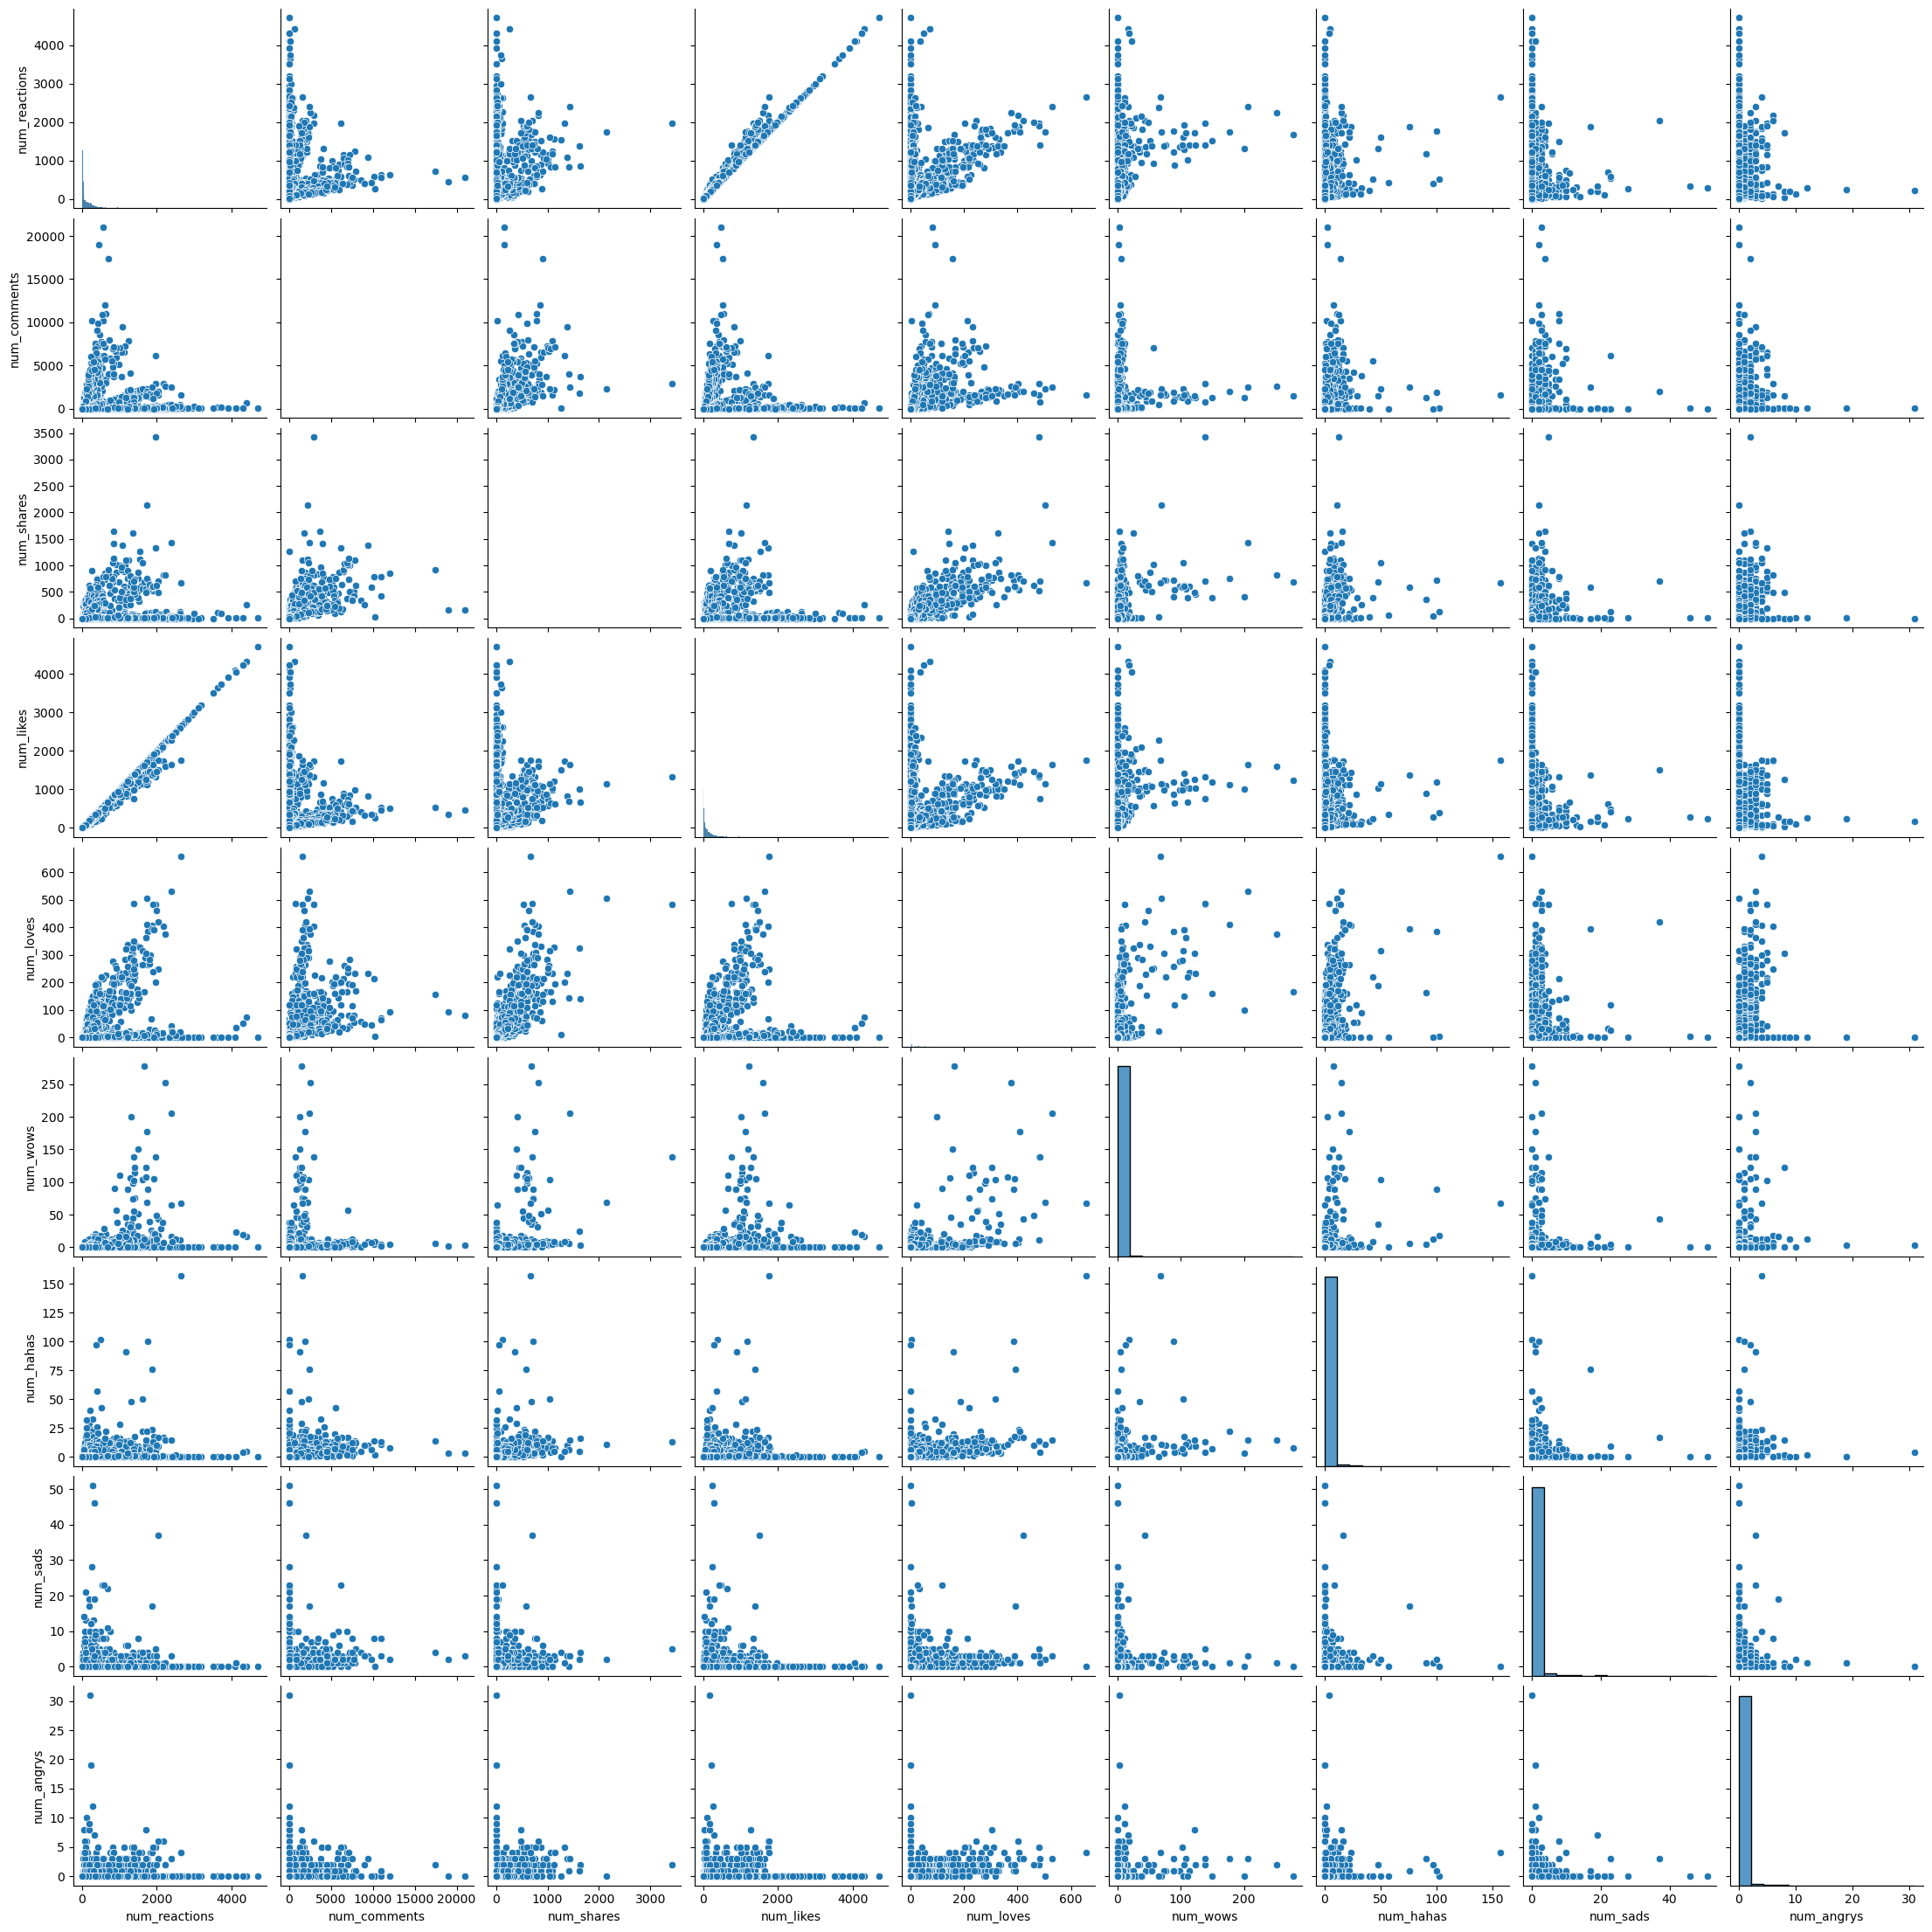

In [13]:
sns.pairplot(sales.iloc[:,[1,2,3,4,5,6,7,8,9]])

C:\Users\Asus\AppData\Local\Temp\ipykernel_28336\3184440594.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sales.corr(), annot=True);


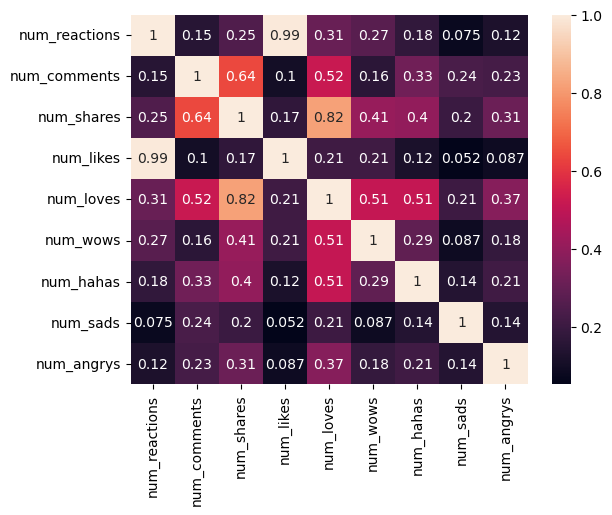

In [14]:
sns.heatmap(sales.corr(), annot=True);

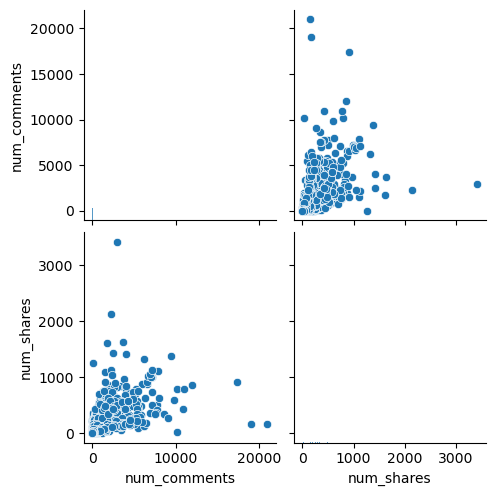

In [15]:
sns.pairplot(sales.iloc[:,[2,3]])

In [ ]:
sns.pairplot(sales.iloc[:,[3,5]])

In [17]:
#Setting Status type as the dependent/target variable
X = sales
Y = sales['status_type']

In [18]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler
X= sales.iloc[:, [1,2,3,4,5,6,7,8,9]]
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X #to see the standardised values

array([[ 0.64610394,  0.32335035,  1.6868788 , ...,  0.07671305,
         0.47357035, -0.15574803],
       [-0.17319166, -0.25220622, -0.3041444 , ..., -0.17600986,
        -0.152587  , -0.15574803],
       [-0.00673846,  0.01308938,  0.12901714, ...,  0.07671305,
        -0.152587  , -0.15574803],
       ...,
       [-0.49312768, -0.25220622, -0.3041444 , ..., -0.17600986,
        -0.152587  , -0.15574803],
       [ 0.26131603, -0.23871662, -0.13695924, ..., -0.17600986,
        -0.152587  , -0.15574803],
       [-0.46070173, -0.25220622, -0.3041444 , ..., -0.17600986,
        -0.152587  , -0.15574803]])

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

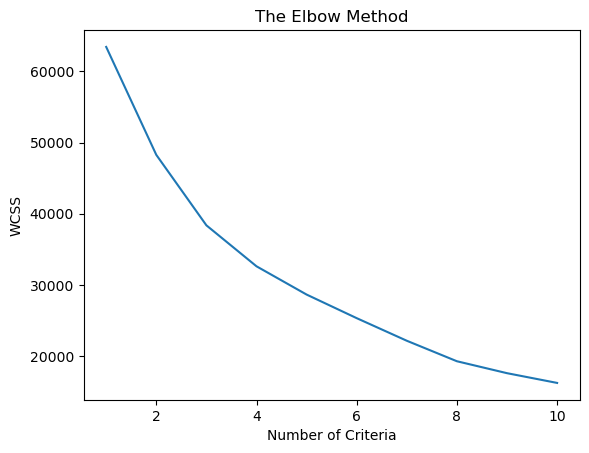

In [19]:
#Now to calculate the optimal number of clusters using the elbow method
from sklearn.cluster import KMeans
wcss = []
for i in range (1, 11):
    kmeans= KMeans(n_clusters = i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range (1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Criteria')
plt.ylabel('WCSS')
plt.show()

From the elbow method we gather that the optimal amount of clusters for this sample are 2

## The Density-Based Spatial Clustering of Applications with Noise DBSCN method`

In [20]:
# now predicting y
kmeans= KMeans(n_clusters = 2, random_state=42)
y_kmeans = kmeans.fit_predict(X)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Using the elbow method we conclude that the optimal number of clusters are 2 clusters

In [21]:
y_kmeans

array([0, 0, 0, ..., 0, 0, 0])

Because of the multitude of variables lets use PCA to visualise the 

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.3832663 , 0.19289793])

In [23]:
sum(pca.explained_variance_ratio_)

0.576164238423782

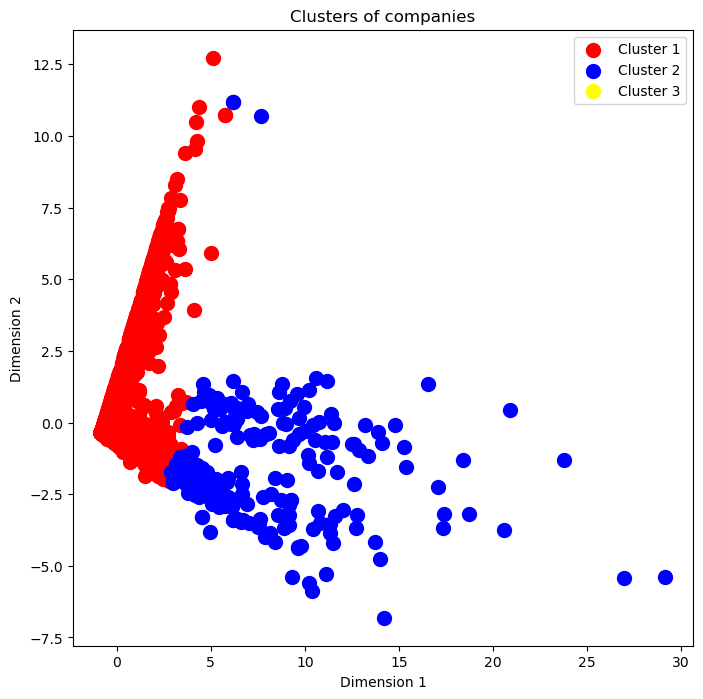

In [24]:
#visiualising the clusters
colours = ['red','blue', 'yellow']
plt.figure(figsize=(8,8))
for i in range(3):
    plt.scatter(X_reduced[y_kmeans == i,0], X_reduced[y_kmeans ==i, 1], s=100, c = colours[i], label = 'Cluster '+str(i+1))
plt.title('Clusters of status types')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

However if we look through the dependent variable we will discover that there are more than just two clusters, perhaps there are sub clusters found within our cluster. My inituition is that the dataset should clusters based on the major 4 unique features in the dependent variable, Status type:'video', 'photo', 'link', 'status'. To investigate further we employ the use of Hierachical/connectivity-based clustering algorithm.

## Hierachical / Agglomerative / connectivity-based clustering algorithm.

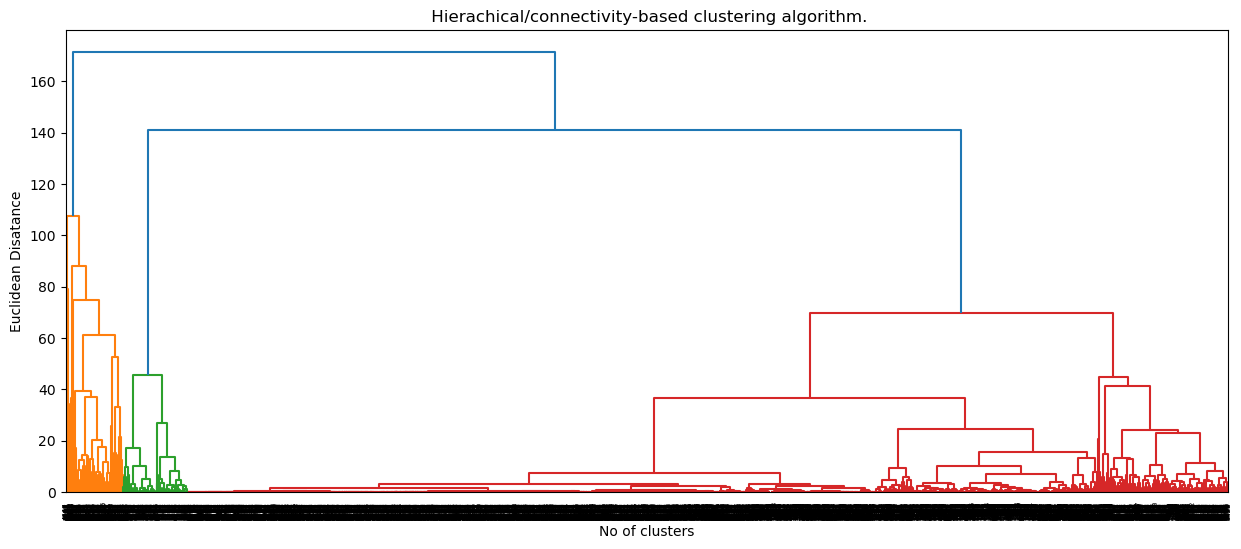

In [25]:
#first let's plot a dendogram to determine the number of clusters and to determine if there are subclusters in this dataset
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,6))

dendrogram =sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title(" Hierachical/connectivity-based clustering algorithm.")
plt.xlabel("No of clusters")
plt.ylabel("Euclidean Disatance")
plt.show()

In [30]:
#using the Agglomerative Clustering Algorithm
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


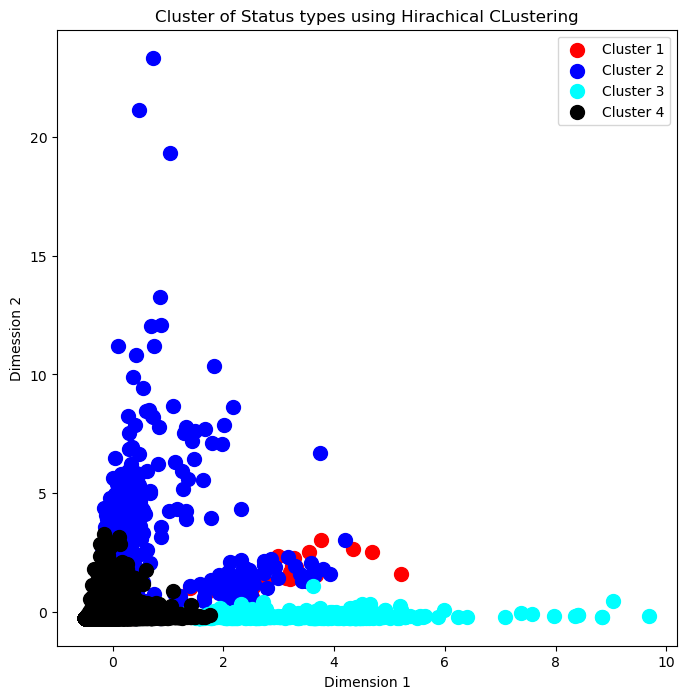

In [33]:
#visualising our clusters
plt.figure(figsize=(8,8))
plt.scatter(X[y_hc == 0,0], X[y_hc == 0,1], s = 100, c = 'red', label= "Cluster 1" )
plt.scatter(X[y_hc == 1,0], X[y_hc == 1,1], s = 100, c = 'blue', label= "Cluster 2" )
plt.scatter(X[y_hc == 2,0], X[y_hc == 2,1], s = 100, c = 'cyan', label= "Cluster 3" )
plt.scatter(X[y_hc == 3,0], X[y_hc == 3,1], s = 100, c = 'black', label= "Cluster 4" )
plt.title("Cluster of Status types using Hirachical CLustering")
plt.xlabel("Dimension 1")
plt.ylabel('Dimession 2')
plt.legend()
plt.show()